In [36]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
#import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

## 0. Выберите любой датасет, связанный с медицинской тематикой.

# 1. Провести EDA
Просмотреть структуру данных, значения каждого признака, поискать особенности в признаках и в данных вцелом

# 2. Спланировать эксперимент 


Эксперимент - составить план, по которому будет проделана исследовательская работа. Примерные пункты плана:
* Составить первичный список признаков, необходимых для решения задачи
* Сгенерировать список новых признаков, которые можно получить из данных
* Применить понижение размерности для визуализации данных
* Применить кластеризацию, визуализировать
* Описание кластера
* Любые другие пункты

# 3. Выполнить подготовку данных для построения модели

Выполнить необходимые преобразования данных

# 4. Провести построение модели 

# 5. Проанализировать результат
получилось или нет, почему, что можно улучшить, можно ли интерпретировать результат

# 6. Повторить при необходимости 

# Подсказки

* Проводить EDA и работу с признаками на всем датасете
* Для построения модели отсеивать данные тем или иным способом (обосновать выбор) - уменьшить объем данных для анализа
* Оформлять для сдачи задания все эксперименты (в том числе неудачные). Так мы сможем увидеть процесс работы над заданием
* Не тратить 90% времени на первый этап. Планировать время так, чтобы успеть поработать над моделью (в равной степени над каждым пунктом).

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,nan
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,nan
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,nan
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,nan
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,nan


In [3]:
df['diagnosis'] = pd.Categorical(df.diagnosis).codes 
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
X = df.drop(['id', 'diagnosis'], axis=1)
X.shape

(569, 30)

In [6]:
y = df['diagnosis']
y.shape

(569,)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.components_.shape

(2, 30)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Выберем важные признаки при помощи RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
importances = sorted(zip(rfc.feature_importances_, x_train.columns), reverse=True)[:10]
importances

[(0.2566801231822051, 'concave points_worst'),
 (0.11515065623562852, 'perimeter_worst'),
 (0.09456016703013617, 'area_worst'),
 (0.09137329213051706, 'radius_worst'),
 (0.08409864425606016, 'concave points_mean'),
 (0.07072859709152224, 'radius_mean'),
 (0.06627222083750199, 'area_mean'),
 (0.060206031223004386, 'perimeter_mean'),
 (0.028771808352358274, 'concavity_worst'),
 (0.022449413067889598, 'texture_mean')]

<BarContainer object of 10 artists>

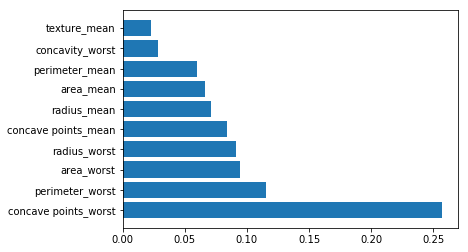

In [12]:
val = [i[0] for i in importances]
feat = [i[1] for i in importances]
plt.barh(feat, val)

In [13]:
x_train_feat = x_train[feat]
x_test_feat = x_test[feat]
x_test_feat.head()

,concave points_worst,perimeter_worst,area_worst,radius_worst,concave points_mean,radius_mean,area_mean,perimeter_mean,concavity_worst,texture_mean
99,0.16,109.50,826.40,16.33,0.06,14.42,642.50,94.48,0.32,19.77
96,0.06,82.14,495.20,12.83,0.03,12.18,451.10,77.79,0.05,17.84
160,0.08,88.91,543.90,13.32,0.04,11.75,419.80,76.10,0.20,20.18
139,0.09,76.53,434.00,11.92,0.05,11.28,384.80,73.00,0.09,13.39
237,0.14,161.70,1750.00,24.22,0.06,20.48,1306.00,132.50,0.32,21.46


Можно выбрать лучшие признаки при помощи Recursive feature elimination

In [15]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator = rfc, scoring = 'accuracy')
rfecv.fit(x_train, y_train)

RFECV(cv='warn',
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

Оптимальное число признаков:

In [16]:
rfecv.n_features_

22

In [17]:
x_train.columns[rfecv.support_]

Index(['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se',
       'fractal_dimension_se', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [18]:
importances_r = sorted(zip(rfecv.grid_scores_, x_train.columns), reverse=True)
importances_r

[(0.9598221016131463, 'texture_worst'),
 (0.9547715965626414, 'concavity_mean'),
 (0.9522463440373888, 'compactness_se'),
 (0.9497587818483341, 'smoothness_se'),
 (0.9497587818483341, 'perimeter_se'),
 (0.9497587818483341, 'concavity_se'),
 (0.9472712196592794, 'texture_se'),
 (0.9472335293230816, 'symmetry_se'),
 (0.9447459671340269, 'perimeter_worst'),
 (0.9447459671340268, 'smoothness_mean'),
 (0.944708276797829, 'radius_worst'),
 (0.9446705864616312, 'symmetry_worst'),
 (0.9422584049449721, 'radius_se'),
 (0.9422584049449721, 'compactness_mean'),
 (0.9398085330921152, 'symmetry_mean'),
 (0.9397708427559174, 'concave points_mean'),
 (0.9397331524197196, 'concave points_worst'),
 (0.9397331524197196, 'concave points_se'),
 (0.9396577717473239, 'fractal_dimension_se'),
 (0.9396577717473239, 'compactness_worst'),
 (0.9372832805668626, 'fractal_dimension_mean'),
 (0.9371325192220715, 'smoothness_worst'),
 (0.9347203377054124, 'area_worst'),
 (0.9346826473692146, 'area_se'),
 (0.93460726

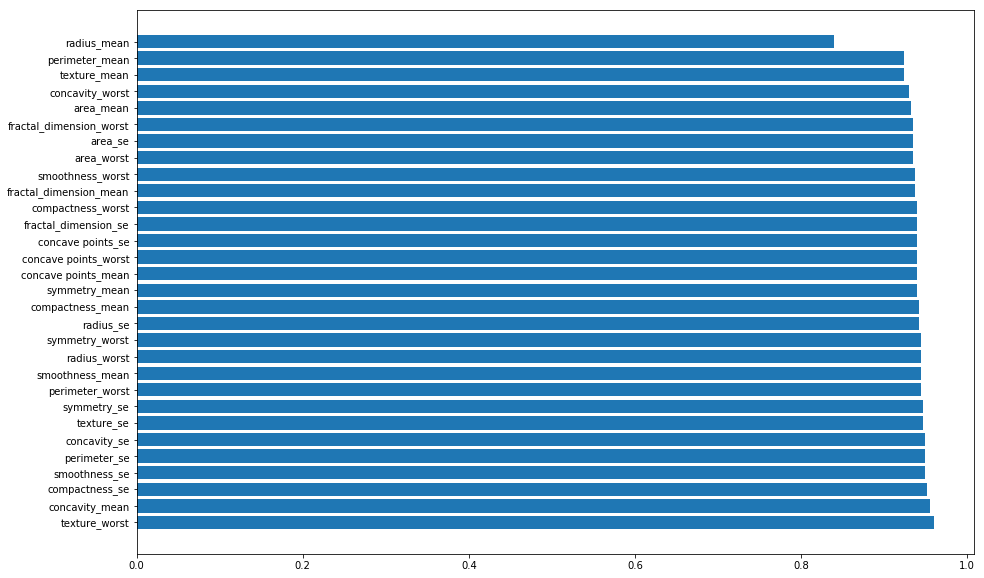

In [39]:
val_r = [i[0] for i in importances_r]
feat_r = [i[1] for i in importances_r]
plt.barh(feat_r, val_r)
plt.show()

Проводим PCA и используем t-sne для визуализации

In [26]:
from sklearn.manifold import TSNE

In [27]:
pca.fit(X)
reduced_x = pca.fit_transform(X) 
print(reduced_x.shape)
print(reduced_x)

(569, 2)
[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


<function matplotlib.pyplot.show(*args, **kw)>

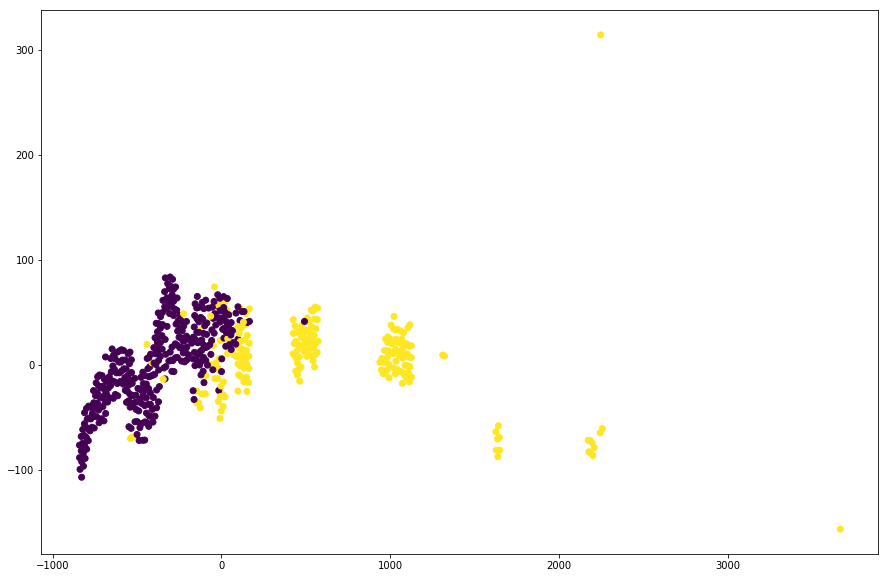

In [38]:
tsne = TSNE(init='pca')
tsne_plot = tsne.fit_transform(reduced_x)
plt.scatter(tsne_plot[:, 0], tsne_plot[:,1], c=y)
plt.show

Кластеризация по этим компонентам

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

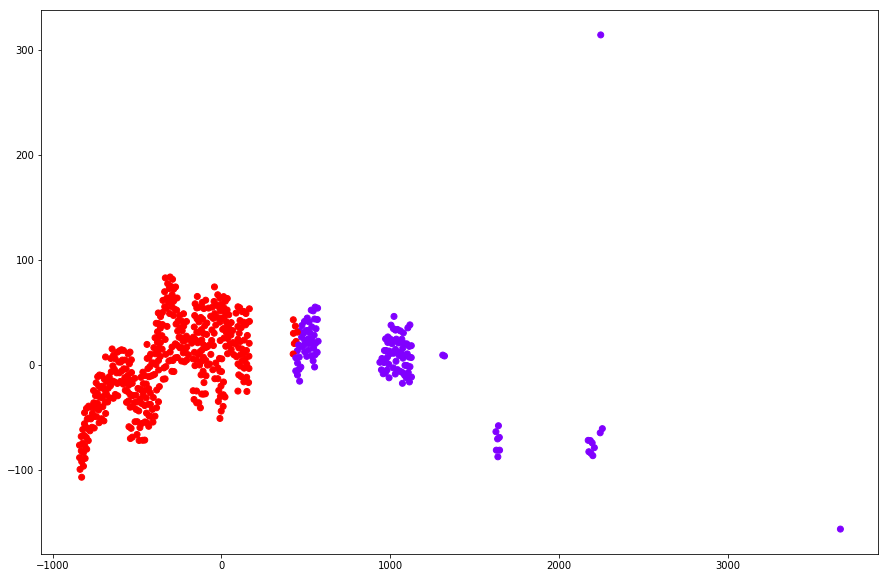

In [37]:
plt.scatter(tsne_plot[:, 0], tsne_plot[:,1], c=kmeans.labels_, cmap='rainbow')  

Вывод: Выполнение PCA перед кластерным анализом может помочь уменьшить размерность и визуализировать / выявлять кластеры.